In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

# Core Functions

In [ ]:
# Computes the Euclidean distance between data points and cluster centers
def compute_distance(data, center):
    data_expd = data[:, np.newaxis,:]
    center_expd = center[np.newaxis, :, :]
    square_diff = np.square(data_expd - center_expd)
    return np.sqrt(np.sum(square_diff, axis=2))

# Assigns each data point to the nearest cluster
def assign_cluster(data, center):
    distance = compute_distance(data, center)
    return np.argmin(distance, axis=1)

# Calculate means position of points in each cluster and return new center position
def update_center(data, cluster, k):
    return np.array([data[cluster == i].mean(axis=0) for i in range(k)])

def k_means(data, k, max_iter=100, n_restart=10):
    best_centers = None
    best_clusters = None
    best_cost = float('inf')

    for _ in range(n_restart):
        centers = data[np.random.choice(len(data), k, replace=False)]

        for _ in range(max_iter):
            clusters = assign_cluster(data, centers)
            new_centers = update_center(data, clusters, k)
            if np.all(centers == new_centers):
                break
            centers = new_centers

        distances = compute_distance(data, centers)
        cost = 0
        for i in range(k):
            indices = np.where(clusters == i)[0]
            cost += np.sum(distances[indices, i])

        if cost < best_cost:
            best_centers = centers
            best_clusters = clusters
            best_cost = cost

    return best_centers, best_clusters, best_cost


In [ ]:
# Function to get lowest had highest threshold to filter data in features:
def get_l_h_threshold(data):
    mean = np.mean(data)
    std = np.std(data)
    lwst_threshold = mean - 3 * std
    hghst_threshold = mean + 3 * std
    return lwst_threshold, hghst_threshold

# Plot functions

In [ ]:
def plot_cost_curve(costs, k_range):
    plt.figure()
    plt.plot(k_range, costs, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Cost')
    plt.title('Elbow Method')
    plt.show()

def plot_clusters_2d(data, centers, title, feature_names=None):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=assign_cluster(data, centers), cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', linewidth=3)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()


def plot_clusters_3d(data, centers, clusters, title, feature_names=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clusters)
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x')
    if feature_names:
        ax.set_xlabel(feature_names[0])
        ax.set_ylabel(feature_names[1])
        ax.set_zlabel(feature_names[2])
    plt.title(title)
    plt.show()

# Data Processing

In [ ]:
data_pd = pd.read_csv('kmeans_dataset.csv', delimiter=';')

In [ ]:
# Filter out the outter data for better cluster
features = ['Fresh', 'Milk']

filtered_data = data_pd[features]
for feature in features:
    lwst_threshold, hghst_threshold = get_l_h_threshold(data_pd[feature])
    filtered_data = filtered_data[(data_pd[feature] <= hghst_threshold)
                                  & (data_pd[feature] >= lwst_threshold)]

data = filtered_data.values

# Elbow method for best cluster number

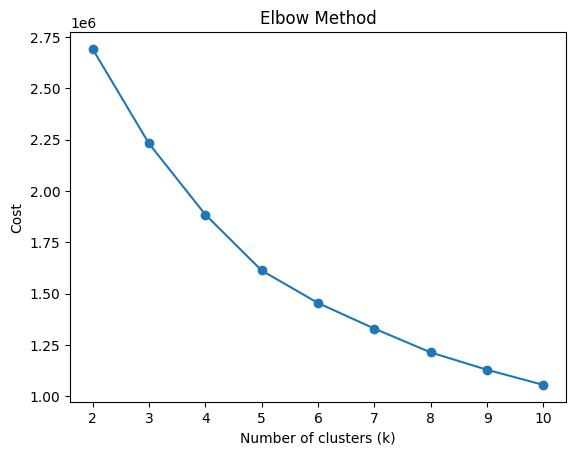

In [ ]:
best_cost = []
for K_cluster in range(2, 11):
    _, _, cost = k_means(data, K_cluster)
    best_cost.append(cost)
plot_cost_curve(best_cost, range(2, 11))

Best cost: 1885374.7239840906


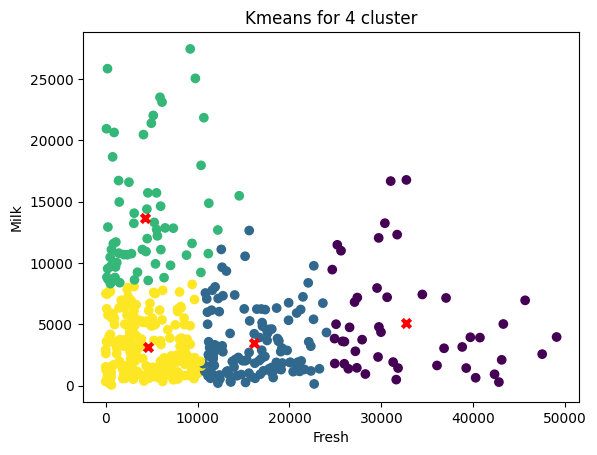

In [ ]:
k = 4
best_centers, _ , best_cost = k_means(data, k)
print(f"Best cost: {best_cost}")
plot_clusters_2d(data, best_centers,f'Kmeans for {k} cluster',features)

Best cost: 1612826.6714591165


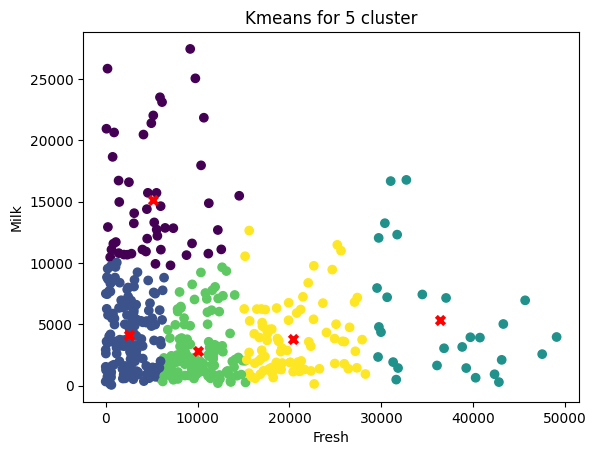

In [ ]:
k = 5
best_centers, _ , best_cost = k_means(data, k)
print(f"Best cost: {best_cost}")
plot_clusters_2d(data, best_centers,f'Kmeans for {k} cluster',features)

# Kmeans with multiple features

In [ ]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

multi_filtered_data = data_pd[features]
for feature in features:
    lwst_threshold, hghst_threshold = get_l_h_threshold(data_pd[feature])
    multi_filtered_data = multi_filtered_data[(data_pd[feature] <= hghst_threshold)
                                              & (data_pd[feature] >= lwst_threshold)]

data = multi_filtered_data.values

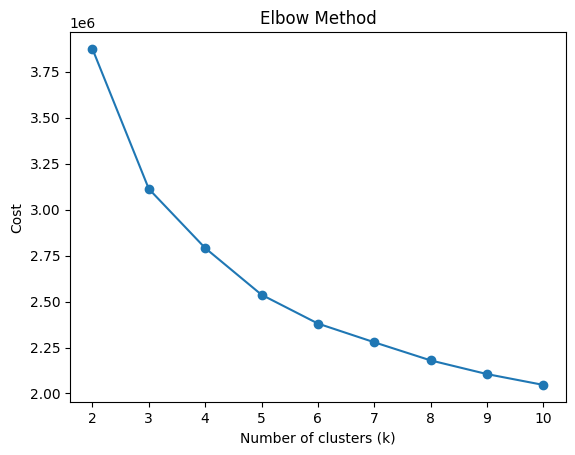

In [ ]:
best_cost = []
for K_cluster in range(2, 11):
    _, _, cost = k_means(data, K_cluster)
    best_cost.append(cost)
plot_cost_curve(best_cost, range(2, 11))

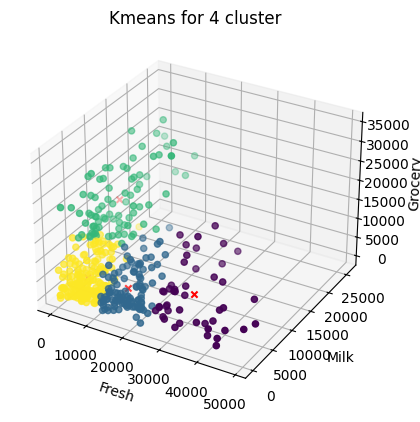

In [ ]:
k = 4
best_centers, best_clusters , best_cost = k_means(data, k)
#print(f"Best cost: {best_cost}")
plot_clusters_3d(data, best_centers, best_clusters,f'Kmeans for {k} cluster',['Fresh', 'Milk', 'Grocery'])

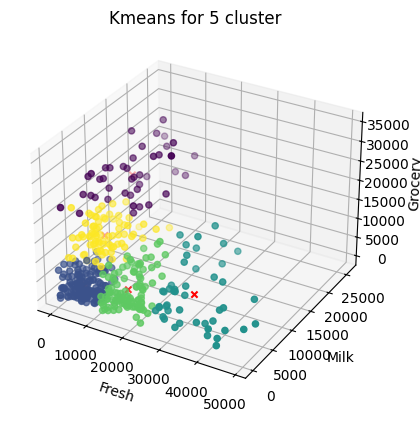

In [ ]:
k = 5
best_centers, best_clusters , best_cost = k_means(data, k)
#print(f"Best cost: {best_cost}")
plot_clusters_3d(data, best_centers, best_clusters,f'Kmeans for {k} cluster',['Fresh', 'Milk', 'Grocery'])